# 案例 1 —— 基于智能手机的简化人类行为识别


- Simplified Human Activity Recognition w/Smartphone
    - [访问 Kaggle 链接(简化版本)](https://www.kaggle.com/mboaglio/simplifiedhuarus/)

## 1.1 数据集

### 1.1.1 数据集介绍


- 出自意大利、西班牙学者（2013年）
    - Jorge L. Reyes-Ortiz、Davide Anguita、等


- 参考文献
    - [Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, Jorge L. Reyes-Ortiz. Energy Efficient Smartphone-Based Activity Recognition using Fixed-Point Arithmetic. Journal of Universal Computer Science, vol. 19, no. 9 (2013), 1295-1314](https://pdfs.semanticscholar.org/dc70/24840a4ba7ab634517fae53e77695ff5dda9.pdf)
    - 本地 pdfs 文件夹

- 数据采集装备 —— 智能手机
    - 可在腰部穿戴
    - 含内置式惯性传感器
<img src="figures/phone_belt.png" width="500">


- 数据用途
    - 记录人类的 30 种日常生活行为 (Activities of Daily Living, ADL) 数据
    - 从事基于大数据的人类行为研究

- 方案设计
    - 召集 30 个年龄介于 19～48 的自愿者进行试验
    - 每人腰部穿戴着智能手机(Samsung Galaxy S II)，做 6 种动作
        - 坐 —— SITTING
        - 立 —— STANDING
        - 卧 —— LAYING
        - 行 —— WALKING
        - 上 —— WALKING_UPSTAIRS
        - 下 —— WALKING_DOWNSTAIRS
    - 通过嵌入式加速度仪(accelerometer)和陀螺仪(gyroscope)，采集以下信号 (采样频率 50Hz)
        - 三轴加速度
        - 三轴角速度
    - 录制试验视频以便人工标识
        - [视频 youtube 链接](http://www.youtube.com/watch?v=XOEN9W05_4A)
    - 对数据进行随机拆分
        - 70% 的自愿者 用着训练集
        - 30% 的自愿者 用着测试集


<img src="figures/pipeline.png" width="750">

### 1.1.2 问题 —— 基于智能手机采集数据集的人类行为识别


- 网络数据源
    - [UCI 机器学习数据仓库](https://archive.ics.uci.edu/ml/index.php)
        - [https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)


- 数据下载
    - [https://archive.ics.uci.edu/ml/machine-learning-databases/00240/](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/)


- 特征信息
    - 三轴加速度信号和估计的身体运动加速度
    - 三轴角速度


- 预处理
    - 带有时频域变量的 `特征向量`(特征数：561)
    - 行为标识
    - 其它处理

### 1.1.3 数据后来经过升级 —— 考虑姿态变迁


- 访问升级数据
    - [http://archive.ics.uci.edu/ml/machine-learning-databases/00341/](http://archive.ics.uci.edu/ml/machine-learning-databases/00341/)


<img src="figures/posture_change.png" width="600">

- 升级数据包含
    - 行为之间的姿态变迁记录
    - 未经过预处理的原始信号

### 1.1.4 简化问题 —— 基于智能手机采集数据集的<font color="red">简化</font>人类行为识别


- 简化目的 —— 介绍机器学习课程的教学工具


- 数据下载
    - [https://www.kaggle.com/mboaglio/simplifiedhuarus](https://www.kaggle.com/mboaglio/simplifiedhuarus)

## 1.2 人类行为识别

- 由智能手机传感器数据，请你来识别人的行为模式

### 1.2.1 导入模块

- ipython
- numpy
- pandas
- matplotlib

In [1]:
%matplotlib inline
from IPython.display import display

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

### 1.2.2 加载训练数据帧

In [2]:
shar_df = pd.read_csv('data/train.csv') 
shar_df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


### 1.2.3 观察数据


- 发现
    - 563 个特征 —— 预处理（信号过滤、统计分析、......）


- 描述
    - activity —— 行为（坐、立、卧、行、上、下）
    - 其它特征


- 字节含义
    - 首字母 —— t、f
    - Body —— 身体
    - Gravity —— 重力
    - Acc —— 加速度
    - Gyro —— 回转仪（角速度？）
    - mean、std、max、min、... —— 均值、标准差、最大、最小、...
    - X、Y、Z —— 分量方向
    - Jerk —— 时间变化率，如 $\dfrac{d\mathbf{A}}{dt}$

In [3]:
# 列标识
shar_df.columns

Index(['rn', 'activity', 'tBodyAcc.mean.X', 'tBodyAcc.mean.Y',
       'tBodyAcc.mean.Z', 'tBodyAcc.std.X', 'tBodyAcc.std.Y', 'tBodyAcc.std.Z',
       'tBodyAcc.mad.X', 'tBodyAcc.mad.Y',
       ...
       'fBodyBodyGyroJerkMag.meanFreq', 'fBodyBodyGyroJerkMag.skewness',
       'fBodyBodyGyroJerkMag.kurtosis', 'angle.tBodyAccMean.gravity',
       'angle.tBodyAccJerkMean.gravityMean', 'angle.tBodyGyroMean.gravityMean',
       'angle.tBodyGyroJerkMean.gravityMean', 'angle.X.gravityMean',
       'angle.Y.gravityMean', 'angle.Z.gravityMean'],
      dtype='object', length=563)

In [4]:
shar_df.tail()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
3604,10277,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.706,0.0646,-0.660,0.274,0.176
3605,10278,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.739,0.8710,-0.653,0.278,0.180
3606,10279,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.960,0.0866,-0.657,0.272,0.183
3607,10280,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.927,-0.0843,-0.657,0.267,0.188
3608,10281,WALKING_DOWNSTAIRS,0.393,-0.01780,-0.0902,-0.0963,-0.1740,-0.257,-0.153,-0.2080,...,0.0894,0.2740,-0.0368,-0.7430,-0.0802,0.927,-0.6520,-0.807,0.190,0.118


In [5]:
print('数据帧维度: ', str(shar_df.shape))

数据帧维度:  (3609, 563)


### 1.2.4 目标数值化


- 目标值 —— activity


- 6 种类别 —— 坐、立、卧、行、上、下

#### (1) 标签编码器对象

In [6]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

#### (2) 通过行为编码获得目标名称

In [7]:
target_names = labelEncoder.fit(shar_df["activity"]).classes_
print ("行为分类：\n", target_names)

行为分类：
 ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


#### (3) 目标名称转换成整数

In [8]:
target_tags = labelEncoder.transform(target_names)
print ("行为分类整数标识：\n", target_tags)

行为分类整数标识：
 [0 1 2 3 4 5]


#### (4) 目标数组 —— 行为编码实现

In [9]:
shar_df["activity"]

0                 STANDING
1                 STANDING
2                 STANDING
3                 STANDING
4                 STANDING
               ...        
3604      WALKING_UPSTAIRS
3605      WALKING_UPSTAIRS
3606      WALKING_UPSTAIRS
3607      WALKING_UPSTAIRS
3608    WALKING_DOWNSTAIRS
Name: activity, Length: 3609, dtype: object

In [10]:
targets = labelEncoder.transform(shar_df["activity"])
targets

array([2, 2, 2, ..., 5, 5, 4])

### 1.2.5 为什么数据长成这样？


- 原以为数据是下面形式的时程信号 (取自参考文献 4)
<img src="figures\walking.jpg" width="600">

- 信号不是时间序列形式的原始信号
    - 经过了预处理


- 未提供用来标识的视频


- 滤波法去除噪声


- 总加速度分解 $\mathbf{A}=\mathbf{G}+\mathbf{BA}$
    - $\mathbf{A}$ —— 总加速度
    - $\mathbf{G}$ —— 重力加速度分量
    - $\mathbf{BA}$ —— 身体加速度分量

- 采集数据试验 (取自参考文献 1)
    - 获取三向加速度信号（运动方向、上下方向、左右方向）
    - 程纬老师注：对加速度信号质量持保留意见(所有曲线应该在零线上下往复)
<img src="figures/walking.png" width="600">


<img src="figures/walking_upstairs.png" width="600">

- 频域参数
    - 低频界限 $ < 0.3 \;\rm{Hz}$
    - 频域范围 $ < 20 \;\rm{Hz}$
    - 采样频率 $50\;\rm{Hz}$ 足够


- 时域参数
    - 正常人行走速度约为 90～130 步/分钟
    - 每秒 1.5 步（最少）


- 取时间窗 —— 至少覆盖一个运动周期(行走 2 步的时间)
    - 上图时间范围为 4 秒
    - 大约行走 7 步

### 1.2.6 去除无用特征


- rn
- activity

In [11]:
# 去除无用特征列
shar_df = shar_df.drop(['rn', 'activity'], axis = 1)
shar_df.head()

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,-0.941,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,-0.940,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,-0.943,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,-0.926,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,-0.946,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


### 1.2.7 检查丢失值

#### (1) 丢失值数据帧

In [12]:
nan_df = pd.DataFrame(shar_df.isnull().sum())
nan_df.columns = ['nanSum']
nan_df.head()

,nanSum
tBodyAcc.mean.X,0
tBodyAcc.mean.Y,0
tBodyAcc.mean.Z,0
tBodyAcc.std.X,0
tBodyAcc.std.Y,0


#### (2) 丢失值数之和

In [13]:
print('丢失值数： ', nan_df.sum());

丢失值数：  nanSum    0
dtype: int64


#### (3) 小结


- 无丢失值

In [14]:
del nan_df

## 1.3 探索性数据分析 —— EDA

### 1.3.1 绘制散点图

#### (1) 行为标识

In [15]:
# 行为编号
target_tags

array([0, 1, 2, 3, 4, 5])

In [16]:
# 行为名称
target_names

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [17]:
# 行为颜色 —— 用于标注
colors = ['black', 'blue', 'purple', 'yellow', 'green', 'red']

#### (2) 定义绘图函数


- 调用语法
```python
>>> DrawScatter(feature1, feature2, colors=colors,
                target_names=target_names,
                target_tags=target_tags)
```


- 功能 —— 绘制两个特征的散点图


- 参数
    - feature1 —— 特征 1
    - feature2 —— 特征 2

In [18]:
def DrawScatter(feature1, feature2, colors=colors, target_names=target_names, target_tags=target_tags):
    for tag in target_tags:
        px = shar_df[feature1][targets == tag]
        py = shar_df[feature2][targets == tag]
        plt.scatter(px, py, c=colors[tag])

    plt.legend(target_names)
    plt.xlabel(feature1)
    plt.ylabel(feature2)

#### (3) 绘图


- 双特征
    - `tBodyAcc.mean.X` vs `tGravityAcc.mean.X`
    - `tBodyAcc.mean.X` vs `tBodyGyro.mean.X`
    - `tBodyGyro.mean.X` vs `tGravityAcc.mean.X`

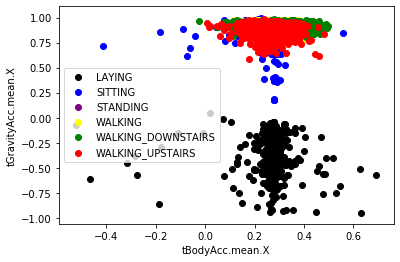

In [19]:
DrawScatter('tBodyAcc.mean.X', 'tGravityAcc.mean.X')

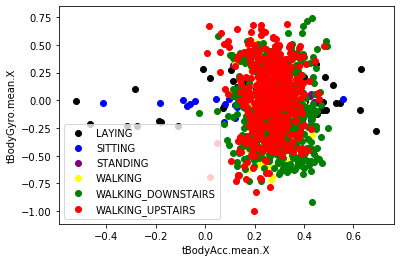

In [20]:
DrawScatter('tBodyAcc.mean.X', 'tBodyGyro.mean.X')

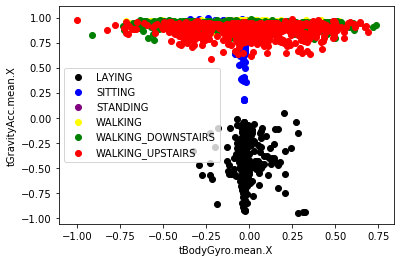

In [21]:
DrawScatter('tBodyGyro.mean.X', 'tGravityAcc.mean.X')

#### (4) 直观印象


- 有些双特征组合有良好的分类效果
- “卧”的行为最好区分

### 1.3.2 绘制分布图

#### (1) 定义绘图函数

In [22]:
def DrawDistributeGraph(feature):
    plt.hist(shar_df[feature], histtype='stepfilled', bins=40)
    plt.xlabel(feature);

#### (2) 绘特征分布图

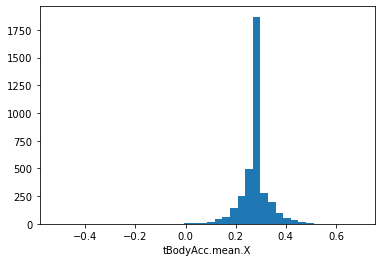

In [23]:
DrawDistributeGraph("tBodyAcc.mean.X")

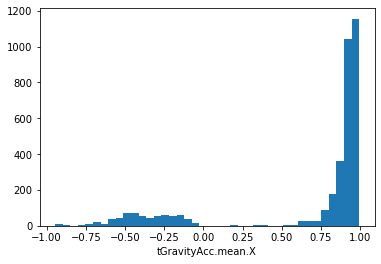

In [24]:
DrawDistributeGraph("tGravityAcc.mean.X")

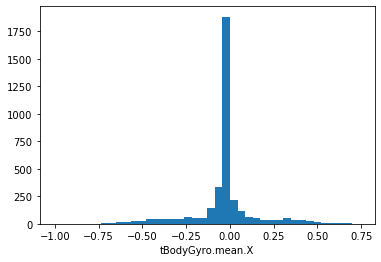

In [25]:
DrawDistributeGraph("tBodyGyro.mean.X")

#### (3) 统计计算


- 所有特征
    - $\min \ge -1$
    - $\max \le 1$

In [26]:
shar_df_stat = shar_df.describe()

In [27]:
shar_df_stat

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,-0.467034,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,0.540188,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,-0.936000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,-0.877000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,-0.018900,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


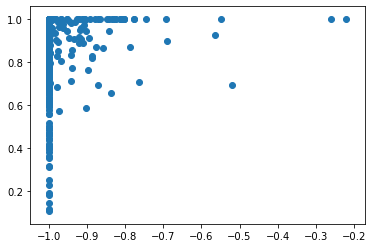

In [28]:
plt.scatter(shar_df_stat.loc["min"], shar_df_stat.loc["max"]);

#### (4) 思考


- tGravityAcc.mean.X 的分布特征不似正态分布
- 数据预处理的质量感觉不好

### 1.3.3 `EDA` 不只是画散点图或分布图


- `EDA` 没有固定程式
    - 目的是：试图借此得到对数据本质的认识


- `EDA` 可以是任意的数据分析
    - 可视化的
    - 数值的
    - 拓扑的
    - 统计的
    - 等等


- 结合问题进行 `EDA` 
    - 比如关注身体运动-重力运动的关系
    - 等等

## 1.4 基于 `SVM` 的分类识别

### 1.4.1 创建 `SVC` 对象

In [29]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

### 1.4.2 拆分数据集

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(shar_df, targets,
                                    test_size=0.25, random_state=0)
X_train.shape, y_train.shape

((2706, 561), (2706,))

### 1.4.3 K-折算法

#### (1) 导入 `KFold` 等

In [31]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

#### (2) 训练与评分

In [32]:
K = 5
cv = KFold(K, shuffle=True, random_state=0)
scores = cross_val_score(svc, X_train, y_train, cv=cv)

In [33]:
print (scores)
print (("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))

[0.97785978 0.97597043 0.98151571 0.97966728 0.97966728]
Mean score: 0.979 (+/-0.001)


#### (3) 成绩 0.979

### 1.4.4 测试评价

#### (1) 训练精度

In [34]:
from sklearn import metrics

In [35]:
svc.fit(X_train, y_train)             # 训练

print ("训练集精度:")
print (svc.score(X_train, y_train))

训练集精度:
0.9981522542498152


#### (2) 测试精度

In [36]:
print ("测试集精度:")
print (svc.score(X_test, y_test))

测试集精度:
0.9778516057585825


#### (3) 分类识别报告

In [37]:
y_pred = svc.predict(X_test)

print ("分类识别报告:")
print (metrics.classification_report(y_test, y_pred))

分类识别报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       0.95      0.92      0.93       155
           2       0.93      0.95      0.94       163
           3       1.00      1.00      1.00       132
           4       1.00      1.00      1.00       133
           5       1.00      1.00      1.00       151

    accuracy                           0.98       903
   macro avg       0.98      0.98      0.98       903
weighted avg       0.98      0.98      0.98       903



#### (4) 混淆矩阵

In [38]:
print ("混淆矩阵:")
print (metrics.confusion_matrix(y_test, y_pred))

混淆矩阵:
[[169   0   0   0   0   0]
 [  0 143  12   0   0   0]
 [  0   8 155   0   0   0]
 [  0   0   0 132   0   0]
 [  0   0   0   0 133   0]
 [  0   0   0   0   0 151]]


In [39]:
row_num = 60
for i in range(len(y_pred)):
    y_p, y_t = y_pred[i], y_test[i]
    if y_p==y_t:
        print("o ", end="")
    else:
        print("X ", end="")
    if (i+1)%row_num==0:print("\n")

o o o o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o X o o o o X 

o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o 

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X 

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o 

o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o 

o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X X o o o X o o o o 

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o 

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o 

o o o o o o o o o o o o 

In [40]:
target_names

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

#### (5) 小结


- 903 个样本
    - 正确 883
    - 错误 20


- SVM 总体不错


- 识别错误发生在
    - 1、2 混淆 —— 坐、立 难区分
    - 可以理解


- 进一步思考
    - 坐、立都是静止状态
    - 卧也是静止状态，为什么能区分呢？
    - 可能特征的方向起作用！

## 1.5 主成分分析 —— `PCA`

### 1.5.1 标准化数据集

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
shar_df = scaler.fit_transform(shar_df)

### 1.5.2 拆分数据集

In [43]:
X_train, X_test, y_train, y_test = train_test_split(shar_df, targets, test_size=0.25, random_state=0)

### 1.5.3 导入并创建 `PCA` 对象

In [44]:
from sklearn.decomposition import PCA
pca_obj = PCA(n_components=6)

### 1.5.4 计算主成分并绘 2D 散点图


- 只考虑 2 个主成分分量

In [45]:
X_pca = pca_obj.fit_transform(X_train)

In [46]:
X_pca.shape

(2706, 6)

In [47]:
# 颜色标注
colors = ['black', 'blue', 'purple', 'yellow', 'green', 'red']

In [48]:
def DrawPCAScatter2D(X_pca, colors=colors, target_tags=target_tags):
    for tag in target_tags:
        px = X_pca[:, 0][y_train == tag]
        py = X_pca[:, 1][y_train == tag]
        plt.scatter(px, py, c=colors[tag])

    plt.legend(target_names)
    plt.xlabel("PC-1")
    plt.ylabel("PC-2")

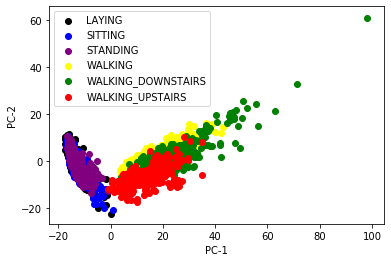

In [49]:
DrawPCAScatter2D(X_pca)

### 1.5.5 绘制 3D 散点图


- 考虑 3 个主成分分量

#### (1) 导入模块

In [50]:
from mpl_toolkits import mplot3d

#### (2) 绘制 `3D` 散点图函数

In [51]:
def DrawPCAScatter3D(X_pca, colors=colors, target_tags=target_tags):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    for tag in target_tags:
        px = X_pca[:, 0][y_train == tag]
        py = X_pca[:, 1][y_train == tag]
        pz = X_pca[:, 2][y_train == tag]
        ax.scatter3D(px, py, pz, c=colors[tag])

    ax.legend(target_names)
    ax.set_xlabel("PC-1")
    ax.set_ylabel("PC-2")
    ax.set_zlabel("PC-3")

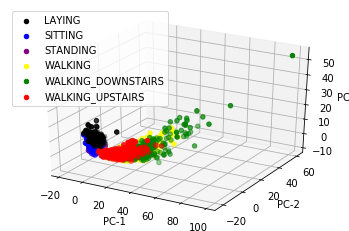

In [52]:
DrawPCAScatter3D(X_pca)

#### (3) `K`-折分析

In [53]:
K = 5
scores = cross_val_score(svc, X_pca, y_train, cv=cv)

In [54]:
print (scores)
print (("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))

[0.87269373 0.82809612 0.82809612 0.8207024  0.83548983]
Mean score: 0.837 (+/-0.009)


#### (4) 效果不如 `SVM`


- `SVM` 算法采用了全部的 561 个特征
- `PCA` 算法只用了 6 个主成分

In [55]:
print(pca_obj.explained_variance_)
print(pca_obj.explained_variance_ratio_)

[280.3454831   36.04347043  15.64669633  13.15587166  10.47985514
   8.98773584]
[0.50497301 0.06492339 0.02818365 0.02369705 0.01887687 0.01618918]


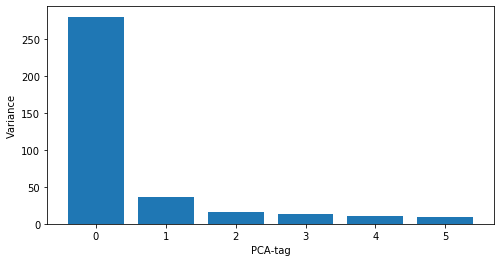

In [56]:
plt.figure(figsize=(8,4))
plt.bar(range(pca_obj.n_components_), pca_obj.explained_variance_)

plt.xlabel('PCA-tag')
plt.ylabel('Variance')
plt.show()

#### (5)  分析


- PCA-1 占比 约 50%
- 以后的方差分布较广


- 说明
    - 少量主成分不一定得到较好的分析结果
    - 数据预处理，仍然不理想

#### (6) 考虑更多的主成分


- 特征数 561
- 主成分 240

In [57]:
pca_obj_240 = PCA(n_components=240)

In [58]:
X_pca = pca_obj_240.fit_transform(X_train)

In [59]:
K = 5
scores = cross_val_score(svc, X_pca, y_train, cv=cv)

In [60]:
print (scores)
print (("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))

[0.96863469 0.96857671 0.97227357 0.97227357 0.96118299]
Mean score: 0.969 (+/-0.002)


#### (7) 主成分数 不到一半 特征数


- 平均得分接近全部特征所做的 PCA

#### (8) 测试精度

In [61]:
print ("测试集精度:")
print (svc.score(X_test, y_test))

测试集精度:
0.9102990033222591


#### (9) 分类识别报告

In [62]:
y_pred = svc.predict(X_test)

print ("分类识别报告:")
print (metrics.classification_report(y_test, y_pred))

分类识别报告:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       169
           1       0.94      0.75      0.84       155
           2       0.95      0.90      0.92       163
           3       0.97      0.95      0.96       132
           4       0.84      1.00      0.91       133
           5       0.96      0.87      0.91       151

    accuracy                           0.91       903
   macro avg       0.92      0.91      0.91       903
weighted avg       0.92      0.91      0.91       903



#### (10) 混淆矩阵

In [63]:
print ("混淆矩阵:")
print (metrics.confusion_matrix(y_test, y_pred))

混淆矩阵:
[[169   0   0   0   0   0]
 [ 28 117   7   1   0   2]
 [  4   7 146   1   1   4]
 [  0   0   0 126   6   0]
 [  0   0   0   0 133   0]
 [  0   0   0   2  18 131]]


In [64]:
row_num = 60
for i in range(len(y_pred)):
    y_p, y_t = y_pred[i], y_test[i]
    if y_p==y_t:
        print("o ", end="")
    else:
        print("X ", end="")
    if (i+1)%row_num==0:print("\n")

o o o o X o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o X o X o o o o X 

o o o o o o o X o o o o o o o o o o o X o o o o o o o o o X o o o o o o o o o o o o o o o o o o X o o o o o X X o X o o 

o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o X 

o o o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o X o o o o o o o o o o 

X o o X o o o o o o o o o o o o o o o o X o o o o X X X o o o o o o o o o o o o o o o o o o X o o o o o o o X o o o o o 

o o o o o o X o o X o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o X o o o o o o o o o X o o o o X o o o o 

o o o o o o o o o o o o o o o o o X o o o o o o o X o o o o o o o o o o o o o o o X o X o o o o o o o o o o o o o o o o 

o o o o o o o o o o o o o X X o o o o o o o o o o o o o o o o o o o o X o o o X o o o o o o o o o o o o o o o o o o o o 

o o o o o o X o o o o o 

In [65]:
target_names

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

#### (11) 小结


- 903 个样本
    - 正确 824
    - 错误 79


- 先利用 `PCA` 降维，再 `SVM` 分类识别
    - 成绩不如前面考虑全部特征的 `SVC`


- 优点
    - "躺"和"下"的分类识别效果最好 100%
    - "行"的分类识别效果其次


- 缺点
    - "立"的分类效果不让人满意


- 可能的改进路线
    - 预处理？
    - 其它分类法
    - 调参
    - 等

## 1.6 结论与展望


- 本课程讲授
    - 机器学习 + 大数据计算
        - Pandas 模块使用
        - 数据源
        - 有监督学习：分类、SVM、NB、DT、RF、等
        - 无监督学习：降维、主成分、聚类、等
        - 特征提取、特征选择、模型选择（调参）
        - 案例介绍
    - 本课程侧重实用


- 未来学习方向
    - 更高级的调参方法、优化调参
    - 神经网络、深度学习
    - 等

### 参考文献


1. [Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, Jorge L. Reyes-Ortiz. Energy Efficient Smartphone-Based Activity Recognition using Fixed-Point Arithmetic. Journal of Universal Computer Science, vol. 19, no. 9 (2013), 1295-1314](https://pdfs.semanticscholar.org/dc70/24840a4ba7ab634517fae53e77695ff5dda9.pdf)
2. Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine.
3. Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. ESANN 2013 proceedings, European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning. Bruges (Belgium), 24-26 April 2013.
4. 王洪涛，楼板结构在人行走激励下的振动分析及性能评估，兰州理工大学，硕士学位论文

### 结束